# Random Forest Assignment

In [70]:
import pandas as pd
import numpy as np

In [71]:
#loading the dataset
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [72]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [73]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [74]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [75]:
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [77]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [78]:
import matplotlib.pyplot as plt

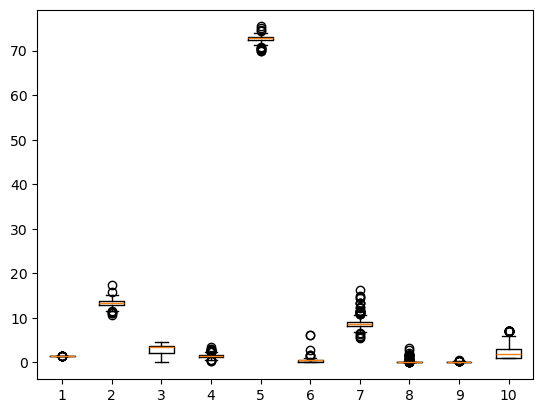

In [79]:
plt.boxplot(df)
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [81]:
sc=StandardScaler()

In [93]:
df_scaled=sc.fit_transform(df.drop('Type',axis=1))

In [95]:
df_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

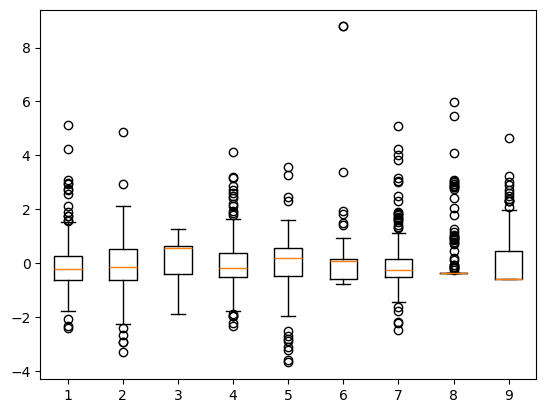

In [97]:
plt.boxplot(df_scaled)
plt.show()

In [99]:
Q1=np.percentile(df,1)
Q3=np.percentile(df,99)
iqr=Q3-Q1
outliers=df[(df<=Q1-iqr*1.5)|(df>=Q3-iqr*1.5)]

In [101]:
outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [87]:
from sklearn.model_selection import train_test_split

In [103]:
X=df_scaled

In [105]:
Y=df['Type']

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
#RandomForestClasssifier ----> BAGGING
model=RandomForestClassifier(n_estimators=100)

In [131]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [133]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [135]:
training_acc=[]
test_acc=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_train)
    y_test=model.predict(X_test)
    training_acc.append(accuracy_score(y_pred,Y_train))
    test_acc.append(accuracy_score(y_test,Y_test))

In [136]:
print('Cross Validation of Training Accuracy:',np.round(np.mean(training_acc),2))
print('Cross Validation of Test Accuracy:',np.round(np.mean(test_acc),2))

Cross Validation of Training Accuracy: 1.0
Cross Validation of Test Accuracy: 0.78


In [139]:
y_test=model.predict(X_test)

In [141]:
accuracy_score(y_test,Y_test)

0.7906976744186046

In [147]:
precision_score(y_test,Y_test,average='weighted')

0.8431660546715627

In [149]:
recall_score(y_test,Y_test,average='weighted')

0.7906976744186046

In [151]:
f1_score(y_test,Y_test,average='weighted')

0.7977801268498943

In [155]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [161]:
#AdaBoostClassifier --->Boosting
ada=AdaBoostClassifier()

In [163]:
ada_model=ada.fit(X_train,Y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [165]:
training_acc=[]
test_acc=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    ada.fit(X_train,Y_train)
    y_pred=ada.predict(X_train)
    y_test=ada.predict(X_test)
    training_acc.append(accuracy_score(y_pred,Y_train))
    test_acc.append(accuracy_score(y_test,Y_test))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\an

In [167]:
print('Cross Valid Train Accuracy:',np.round(np.mean(training_acc),2))
print('Cross Valid Test Accuracy:',np.round(np.mean(test_acc),2))


Cross Valid Train Accuracy: 0.46
Cross Valid Test Accuracy: 0.43


In [169]:
gbb=GradientBoostingClassifier()

In [171]:
gbb_model=gbb.fit(X_train,Y_train)

In [173]:
training_acc=[]
test_acc=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    gbb.fit(X_train,Y_train)
    y_pred=gbb.predict(X_train)
    y_test=gbb.predict(X_test)
    training_acc.append(accuracy_score(y_pred,Y_train))
    test_acc.append(accuracy_score(y_test,Y_test))

In [174]:
print('Cross Valid Train Accuracy:',np.round(np.mean(training_acc),2))
print('Cross Valid Test Accuracy:',np.round(np.mean(test_acc),2))


Cross Valid Train Accuracy: 1.0
Cross Valid Test Accuracy: 0.75


In [177]:
## from the above i noticed that among bagging and boosting classification Bagging is the best Classification Method to predict the accuracy of test data

# Additional Notes
#### 1. Explain Bagging and Boosting methods. How is it different from each other.
##### Bagging ---->Bagging, short for Bootstrap Aggregating, is an ensemble technique that builds multiple independent models (often decision trees) on randomly sampled subsets of the training data, then averages their predictions (for regression) or takes a majority vote (for classification). This approach is intended to reduce variance and prevent overfitting, especially in high-variance models like decision trees.


##### Boosting --->Boosting is an ensemble technique that sequentially builds models, where each new model attempts to correct errors made by the previous ones. Unlike Bagging, Boosting focuses on reducing both bias and variance, by giving more attention to incorrectly predicted samples during the training of subsequent models. The goal is to create a strong model by combining multiple weak learners.


2. Explain how to handle imbalance in the data.
##### Handling imbalanced data is crucial in machine learning, especially in classification tasks, where one class is significantly underrepresented compared to the other(s). Imbalance can lead to biased models that perform poorly on the minority class. Here are several effective techniques for handling imbalanced data
1. To handle the imbalance in data modify the class weights
2. By using the Ensembele specified Imbalanced technics like Balanced RandomForest
3. Use Certified Cross Validation